## **Visualizing fire scars through false color**
Author: Hylaea

Link to the repository: https://github.com/hylaea-miller/eds220-hwk4.git

### **About**

This notebook explores the use of false color imagery to visualize fire scars in satellite images. By manipulating the color channels, we can enhance the visibility of burned areas and analyze the extent and impact of wildfires.

Highlights: List of highlights of analysis (3 or 4 highlights). What do you consider to be the most important aspects of this coding exercise?
About the data: Datasets description
References: Formal references to datasets. 

### **Highlights**
- Exploration of Geo-dataframes for Landsat and fire perimeter data.
- Restored geospatial information to the Landsat dataset using `rio.write_crs()`. 
- Created a false color composite using Landsat bands to highlight fire-affected areas.
- Overlaid fire perimeter data on the false color image to delineate affected areas.

### **Data**

**Landsat Collection of bands**

Contain simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite.

**Palisades and Eaton Dissolved Fire Perimeters**

Contains dissolved fire perimeters/boundaries for Eaton and Palisades fires.

### **References:**
Source: Microsoft Planetary Computer. (2025). Microsoft.com. https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2
Date of accesss: 11/19/2025

Source:  NIFC FIRIS. Palisades and Eaton Dissolved Fire Perimeters (2025). Lacity.org. https://geohub.lacity.org/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about
Date of accesss: 11/19/2025
‌

## Import libraries

In [2]:
# Import libraries
import os              
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr   
import geopandas as gpd

## Import data

In [3]:
# Load lansat data
landsat = xr.open_dataset("data/landsat8-2025-02-23-palisades-eaton.nc")

# Load Eaton perimeter data
fp = os.path.join('data', 'Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp)

# Load Palisades perimeter data
fp = os.path.join('data', 'Palisades_Perimeter_20250121.shp')
palisades = gpd.read_file(fp)

## Fire perimeter data exploration

In [4]:
# Display the heads of the geo-dataframes
print(eaton.head())
print(palisades.head())

   OBJECTID            type    Shape__Are  Shape__Len  \
0         1  Heat Perimeter   2206.265625  270.199719   
1         2  Heat Perimeter  20710.207031  839.204218   
2         3  Heat Perimeter   3639.238281  250.304502   
3         4  Heat Perimeter   1464.550781  148.106792   
4         5  Heat Perimeter   4132.753906  247.960744   

                                            geometry  
0  POLYGON ((-13146936.686 4051222.067, -13146932...  
1  POLYGON ((-13150835.463 4052713.929, -13150831...  
2  POLYGON ((-13153094.697 4053057.596, -13153113...  
3  POLYGON ((-13145097.740 4053118.235, -13145100...  
4  POLYGON ((-13153131.126 4053196.882, -13153131...  
   OBJECTID            type    Shape__Are   Shape__Len  \
0         1  Heat Perimeter   1182.082031   267.101144   
1         2  Heat Perimeter   2222.488281   185.498783   
2         3  Heat Perimeter     21.011719    22.412814   
3         4  Heat Perimeter    214.992188    76.639180   
4         5  Heat Perimeter  44203.45

In [5]:
# Check the data type of each column
print(eaton.dtypes)
print(palisades.dtypes)

OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object
OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object


In [6]:
# Access the CRS of the eaton Geo-dataframe
eaton.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Access the CRS of the palisades Geo-dataframe
palisades.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

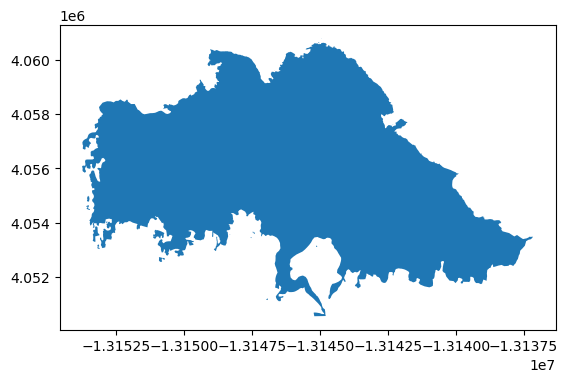

In [8]:
# Visualize Eaton fire extent 
eaton.plot()

<Axes: >

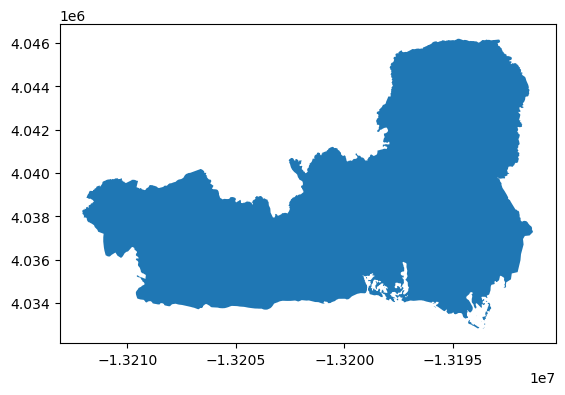

In [9]:
# Visualize Palisades fire extent 
palisades.plot()

### Description of the fire perimeter data

The fire perimeter datasets contains information about the boundaries of the Eaton and Palisades fires. The datasets includes attributes such as OBJECTID, type, area (Shape__Are), length (Shape__Len), and geometry representing the spatial features of the fire perimeters.

The fire perimeter data is in a projected coordinate reference system (CRS) EPSG:3857


### Landsat data exploration

In [10]:
# Check the dataset head
landsat.head()

<xarray.Dataset> Size: 596B
Dimensions:      (y: 5, x: 5)
Coordinates:
  * y            (y) float64 40B 3.799e+06 3.799e+06 ... 3.799e+06 3.799e+06
  * x            (x) float64 40B 3.344e+05 3.344e+05 ... 3.345e+05 3.345e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 100B ...
    green        (y, x) float32 100B ...
    blue         (y, x) float32 100B ...
    nir08        (y, x) float32 100B ...
    swir22       (y, x) float32 100B ...
    spatial_ref  int64 8B ...

In [11]:
# Check the dataset info
landsat.info()

xarray.Dataset {
dimensions:
	y = 1418 ;
	x = 2742 ;

variables:
	float64 y(y) ;
		y:units = metre ;
		y:resolution = -30.0 ;
		y:crs = EPSG:32611 ;
		y:axis = Y ;
		y:long_name = y coordinate of projection ;
		y:standard_name = projection_y_coordinate ;
	float64 x(x) ;
		x:units = metre ;
		x:resolution = 30.0 ;
		x:crs = EPSG:32611 ;
		x:axis = X ;
		x:long_name = x coordinate of projection ;
		x:standard_name = projection_x_coordinate ;
	datetime64[ns] time() ;
	float32 red(y, x) ;
		red:grid_mapping = spatial_ref ;
	float32 green(y, x) ;
		green:grid_mapping = spatial_ref ;
	float32 blue(y, x) ;
		blue:grid_mapping = spatial_ref ;
	float32 nir08(y, x) ;
		nir08:grid_mapping = spatial_ref ;
	float32 swir22(y, x) ;
		swir22:grid_mapping = spatial_ref ;
	int64 spatial_ref() ;
		spatial_ref:crs_wkt = PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["

### Description of Lansat NetCDF data

The Landsat NetCDF data contains multiple spectral bands captured by the Landsat 8 satellite. The dataset includes the following information:

Variables:
red, green, blue, nir08, swir33, spatial_ref

Dimensions:

y: 5, x: 5		

Coordinates:
(CRS) EPSG:32611

(y) array([3799050., 3799020., 3798990., 3798960., 3798930.])

(x) array([334410., 334440., 334470., 334500., 334530.])

units: metre

### Restoring geospatial information

Use rio.crs to print what is the CRS of this dataset. Is this a geospatial object?

In [12]:
# Access the CRS using rio.crs
print(landsat.rio.crs)

None


Print the CRS by using accesing the spatial_ref.crs_wkt attribute of the dataset.

In [13]:
# Access the CRS in WKT format
landsat.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

Recover the geospatial information by using rio.write_crs() and the spatial reference information form part b.

In [14]:
# Write the correct CRS
landsat.rio.write_crs("WGS 84 / UTM zone 11N", inplace=True)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int32 4B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

Print the CRS of the updated dataset.

In [15]:
# Verify the CRS
print(landsat.rio.crs)

EPSG:32611


### True color image

Without creating any new variables:

- Select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
- Convert it to a numpy.array using the to_array() method, and then
- Use .plot.imshow() to create an RGB image with the data. There will be two warnings, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


c:\Users\hylae\.conda\envs\eds220-env\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


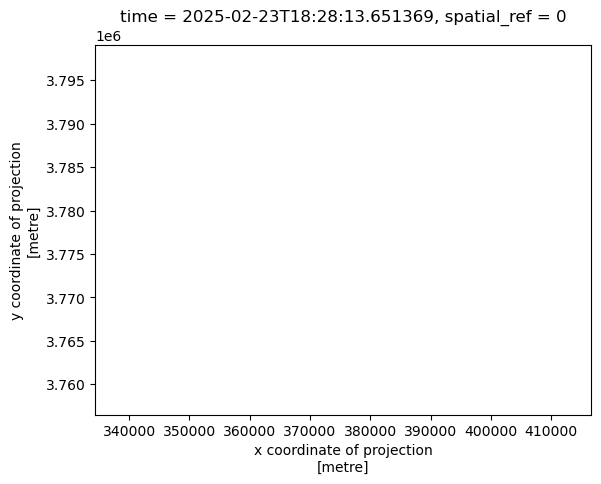

In [16]:
# Selecyt red, green, blue bands, convert to array, and plot
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

To resolve the other warning, identify which bands have nan values. HINT: There are many ways of doing so. One option is to use numpy.isnan().

In [17]:
print(np.isnan(landsat[["red", "green","blue"]]).sum())

<xarray.Dataset> Size: 24B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B ...
    spatial_ref  int32 4B 0
Data variables:
    red          int32 4B 0
    green        int32 4B 1
    blue         int32 4B 109


Use the .fillna() mehtod for xarray.Datasets to substitute the any nan values in the Landsat data for zero.

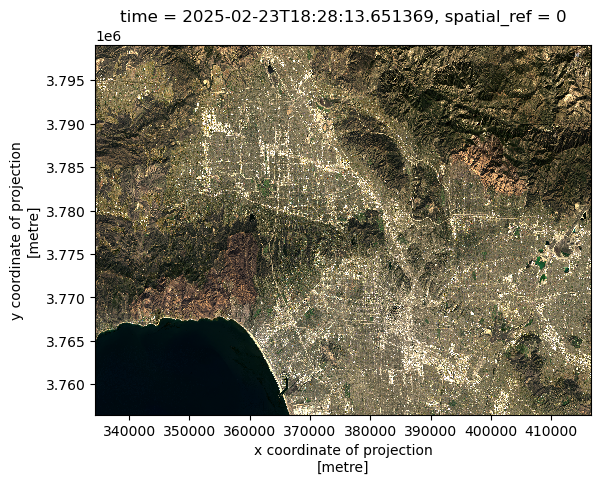

In [18]:
# Create a new true color image that gets plotted without warnings.
landsat[['red', 'green', 'blue']].to_array().fillna(0).plot.imshow(robust = True)

**Brief explanation comparing the plot ouputs of the two true color images (with and without nan values, and without robust = Ture).**

The first output image shows a blank canvas with no visible features, while the second output image displays a true-color representation of the area. The robust=True parameter adjusts the color scaling, allowing the image to be displayed, and filling NaN values with zero prevents gaps in the data and warning messages.

### 6. False color image
Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

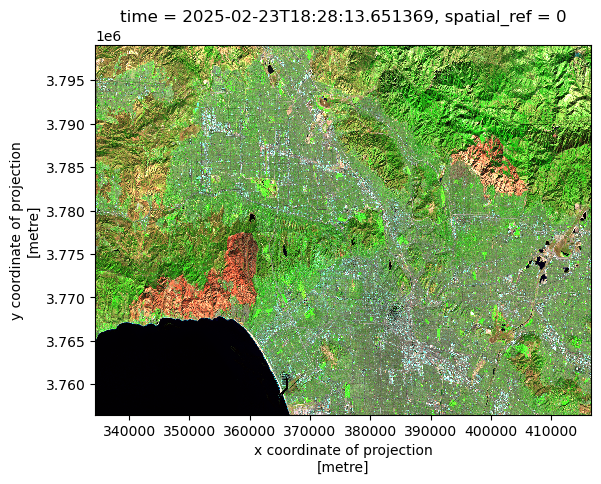

In [19]:
# Plot a false color image using SWIR, NIR, and Red bands
landsat[['swir22', 'nir08', 'red']].to_array().fillna(0).plot.imshow(robust = True)

## 7. Map
Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

In [20]:
# Reproject the fire extends to the landsat dataset
eaton = eaton.to_crs(landsat.rio.crs)
palisades = palisades.to_crs(landsat.rio.crs)

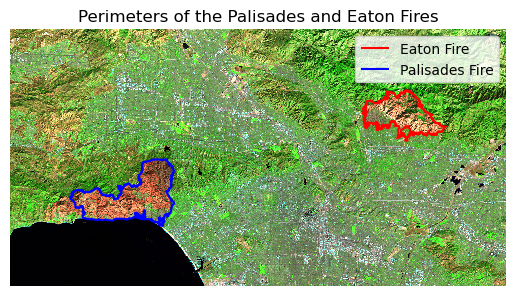

In [32]:
# Plot a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters.
fig, ax = plt.subplots()
landsat[['swir22', 'nir08', 'red']].to_array().fillna(0).plot.imshow(ax=ax, robust=True)
eaton.boundary.plot(ax=ax, edgecolor='red', label='Eaton Fire')
palisades.boundary.plot(ax=ax, edgecolor='blue', label='Palisades Fire')
ax.set_title('Perimeters of the Palisades and Eaton Fires')
ax.legend()
ax.axis('off')
plt.show()

**Write a figure description for the map including a brief explanation of how false color imagery is being used.**

The figure displays a false color composite image using SWIR2, NIR, and red bands, assigned to RGB channels, respectively, to highlight the burned areas from the Palisades and Eaton fires. The healthy vegetation appears in shades of bright green due to high reflectance in the near-infrared band, while the burned areas are shown in shades of brown/magenta, indicating low reflectance in the shortwave infrared band. The fire perimeters are overlaid on the image, with the Palisades fire outlined in blue and the Eaton fire in orange, allowing for easy identification of the affected areas. 